In [1]:
# packages used in this tutorial 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.read_csv('12kr2.csv')
train = df.sample(frac=0.8, random_state=200)
test = df.drop(train.index)
train_data = train[['MONOISOTOPIC_MASS', 'Number of Carbons', 'Number of Fluorines',
       'Contains N', 'Contains O',
       'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE*SEC_OPERA_PRED',
       'BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED',
       'BOILING_POINT_DEGC_OPERA_PRED', 'HENRYS_LAW_ATM-M3/MOLE_OPERA_PRED',
       'OPERA_KM_DAYS_OPERA_PRED',
       'OCTANOL_AIR_PARTITION_COEFF_LOGKOA_OPERA_PRED',
       'SOIL_ADSORPTION_COEFFICIENT_KOC_L/KG_OPERA_PRED',
       'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'MELTING_POINT_DEGC_OPERA_PRED', 'VAPOR_PRESSURE_MMHG_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'Acid Group', 'Hyde Group',
       'Carbon Ring Group', 'Alcohol Group', 'Ether Linkage',
       'Linear Vs. Branched', 'ide', 'ate', 'ite', 'sodium', 'polymer',
       'telomer', 'nitrile', 'Bis', 'Amide', 'Amine', 'Si', 'Sulfur',]].values.astype(float)
train_labels = train['BIOCONCENTRATION_FACTOR_OPERA_PRED'].values.astype(float) 
test_data = test[['MONOISOTOPIC_MASS', 'Number of Carbons', 'Number of Fluorines',
       'Contains N', 'Contains O',
       'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE*SEC_OPERA_PRED',
       'BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED',
       'BOILING_POINT_DEGC_OPERA_PRED', 'HENRYS_LAW_ATM-M3/MOLE_OPERA_PRED',
       'OPERA_KM_DAYS_OPERA_PRED',
       'OCTANOL_AIR_PARTITION_COEFF_LOGKOA_OPERA_PRED',
       'SOIL_ADSORPTION_COEFFICIENT_KOC_L/KG_OPERA_PRED',
       'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'MELTING_POINT_DEGC_OPERA_PRED', 'VAPOR_PRESSURE_MMHG_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'Acid Group', 'Hyde Group',
       'Carbon Ring Group', 'Alcohol Group', 'Ether Linkage',
       'Linear Vs. Branched', 'ide', 'ate', 'ite', 'sodium', 'polymer',
       'telomer', 'nitrile', 'Bis', 'Amide', 'Amine', 'Si', 'Sulfur',]].values.astype(float)
test_labels = test['BIOCONCENTRATION_FACTOR_OPERA_PRED'].values.astype(float)


# Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

print("Training set: {}".format(train_data.shape))  # 6209 examples, 34 features
print("Testing set:  {}".format(test_data.shape))   # 1552 examples, 34 features

Training set: (6209, 34)
Testing set:  (1552, 34)


In [4]:
print(train_labels[0:20])

[6.77861e+01 4.12168e+00 5.90472e+00 2.49955e+05 3.08069e+02 2.32547e+02
 1.07303e+03 1.34768e+02 3.03628e+00 1.64298e+00 3.82387e+01 1.64583e+00
 4.29494e+03 1.37382e+02 3.05390e+01 1.42004e+02 1.02127e+02 1.20363e+01
 2.02548e+00 1.03192e+02]


In [5]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std # (train_data - min) / (max-min) 
test_data = (test_data - mean) / std

print(train_data[0])  # First training sample, normalized

[ 0.40754134  0.05937555  0.72345001 -0.68323379  0.60954777 -0.02500582
 -0.15626002 -0.31448786 -0.03435214  0.40323113  0.17310959 -0.45379286
  0.25455864  0.46098221 -0.01273442 -0.12035373 -0.43291608 -0.04921076
 -0.59564204 -0.43081602  1.84064822 -0.59390514 -0.49551651  2.08077239
 -0.04580533 -0.11710801 -0.0179504  -0.12263789 -0.1185133  -0.33781897
 -0.29946718 -0.29173636 -0.1610647  -0.43265378]


In [6]:
# Define basic architecture
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, #activation=tf.keras.activations.linear,
                       input_shape=(train_data.shape[1],),
                       name='hidden_layer_1',),
    keras.layers.Dense(128, activation=tf.nn.relu,
                       name='hidden_layer_2',),
    keras.layers.Dense(128, activation=tf.nn.relu,
                       name='hidden_layer_3',),
    #keras.layers.Dense(16, activation=tf.nn.relu,
    #                   input_shape=(16,),
    #                   name='hidden_layer_2',),
    keras.layers.Dense(1, name='output_layer',)
])

# Define your optimizer asdf
#optimizer = tf.train.AdamOptimizer()
optimizer = tf.optimizers.Adam()

model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae'])

# show a summary of the data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               4480      
                                                                 
 hidden_layer_2 (Dense)      (None, 128)               16512     
                                                                 
 hidden_layer_3 (Dense)      (None, 128)               16512     
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 37,633
Trainable params: 37,633
Non-trainable params: 0
_________________________________________________________________


2022-01-22 14:46:36.196764: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
        
# Function to plot how the model is doing during training
# Visualize the model's training progress using the stats stored in the history object. 
# We want to use this data to determine how long to train before the model stops making progress.
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Days]')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
    plt.legend()
    #plt.ylim([0, 5])


.................................................

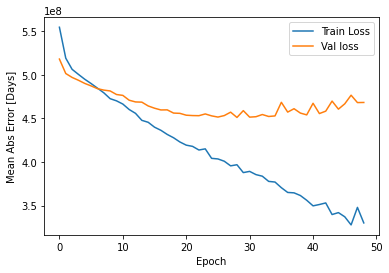

In [8]:
# If you train too long, you are prone to over-fitting
# this prevents the model from generalizing to data it has never seen before
# early stopping is one way to go about this
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Store training stats
history = model.fit(train_data, train_labels, epochs=1000,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [9]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:7.2f} Days".format(mae))

Testing set Mean Abs Error: 2915.86 Days


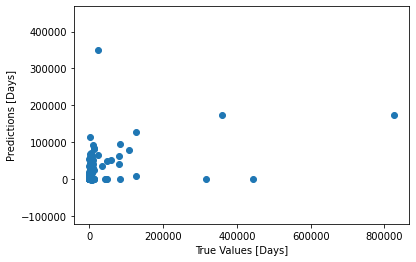

In [10]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Days]')
plt.ylabel('Predictions [Days]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

In [11]:
np.corrcoef(test_labels,test_predictions)[0,1]

0.43813113120374114

In [12]:
from sklearn.metrics import r2_score
r2_score(test_labels,test_predictions)

0.1873042069076708

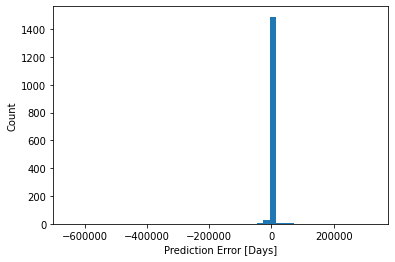

In [13]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [Days]")
_ = plt.ylabel("Count")

In [14]:
#ATTEMPT for hyperparameter optimization and cross validation, require keras classifier binary label?

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
# Step 3: Define the grid search parameters
param_grid_1 = dict(batch_size=[10, 40, 80], epochs=[10, 50])
print(param_grid_1)

{'batch_size': [10, 40, 80], 'epochs': [10, 50]}


In [17]:
# Step 4: Perform the grid search
grid_1 = GridSearchCV(estimator=model, param_grid=param_grid_1, n_jobs=1)
grid_result_1 = grid_1.fit(train_data, train_labels)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.engine.sequential.Sequential object at 0x7f835aa26310> does not.

In [ ]:
# Step 5: Summarize the results
def summarize_results(grid_result):
    means = grid_result.cv_results_['mean_test_score']
    params = grid_result.cv_results_['params']
    print('Results')
    for mean, param in zip(means, params):
        print(f'{param} -- {mean.round(3)}')
    print('')
    print(f'Best: {grid_result.best_score_.round(3)} using {grid_result.best_params_}')
summarize_results(grid_result_1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Define your neural network model as a function
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Create a KerasClassifier model using your model definition function as an argument
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=0)

In [ ]:
#if running again this clears old column
if 'BIODEGRADATION_HALF_LIFE_DAYS_DAYS_CATEGORIES' in df.columns:
    df= df.drop(labels='BIODEGRADATION_HALF_LIFE_DAYS_DAYS_CATEGORIES', axis=1)
#add a new column to df for halflife category low (between 0 and 3.9), medium (greater than 3.9 up to 4.5), high (greater than 4.5 up to 9). 
category = pd.cut(df['BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED'], 3)
df.insert(3,'BIODEGRADATION_HALF_LIFE_DAYS_DAYS_CATEGORIES',category)
#df['BIODEGRADATION_HALF_LIFE_DAYS_DAYS_BINARY'] = np.where(df['BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED']>4.5, 1, 0)
y= df['BIODEGRADATION_HALF_LIFE_DAYS_DAYS_CATEGORIES']
#print(y)
#Analyzes category distribution
df['BIODEGRADATION_HALF_LIFE_DAYS_DAYS_CATEGORIES'].value_counts(normalize=True)

In [ ]:
# Evaluate your model using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(model, train_data, y, cv=kfold)

In [ ]:
# Print the results
print(f'10-fold cross validation scores:')
for result in results: print('\t', result.round(3))
print('', f'mean: {results.mean().round(3)}', sep='\n')